In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

In [2]:
era5 = xr.open_dataset('era5.nc')

In [4]:
speed = np.sqrt(era5['u']**2+era5['v']**2)

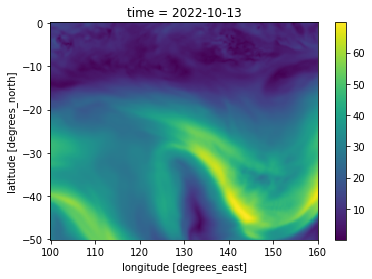

In [6]:
speed.sel(time=np.datetime64('2022-10-13T00:00')).plot()

In [7]:
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

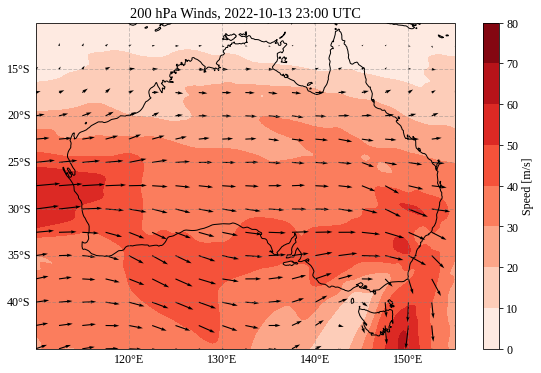

In [36]:
for i in np.arange(0, 24, 1):
    
    plt.close('all')

    rcParams.update({'font.family': 'serif'})
    rcParams.update({'font.serif': 'Liberation Serif'})
    rcParams.update({'mathtext.fontset': 'dejavuserif'})
    rcParams.update({'font.size': 12})

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.coastlines(resolution='50m', zorder=1)

    ax.set_extent([110, 155, -10, -45], crs=ccrs.PlateCarree())
    grid = ax.gridlines(
        crs=ccrs.PlateCarree(), draw_labels=True,
        linewidth=1, color='gray', alpha=0.4, linestyle='--')
    
    grid.right_labels = False
    grid.top_labels = False

    # grid.xlocator = mticker.FixedLocator([120, 125, 130, 135, 140, 145, 150])
    # grid.ylocator = mticker.FixedLocator([-5, -10, -15, -20, -25])

    # c_land = tuple(np.array([249.0, 246.0, 216.0])/256)
    # c_water = tuple(np.array([220.0, 240.0, 250.0])/256)

    states_provinces_50m = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
    
    time = np.datetime64('2022-10-13T00:00') + np.timedelta64(i, 'h')
    
    era5_i = era5.sel(time=time)
    speed_i = speed.sel(time=time)

    con = ax.contourf(
        speed.longitude, speed.latitude, speed_i, 
        cmap='Reds', levels=np.arange(0, 90, 10))
    space = 10
    quiv = ax.quiver(
        speed.longitude[::space], speed.latitude[::space], era5_i['u'][::space,::space],
        era5_i['v'][::space,::space])
    plt.colorbar(con, label='Speed [m/s]')

    plt.title('200 hPa Winds, 2022-10-13 {}:00 UTC'.format(i))

    plt.savefig('h_{:02d}'.format(i), dpi=200, bbox_inches='tight', facecolor='w')

    grid.right_labels = False
    grid.top_labels = False

In [19]:
base_path = 'https://dapds00.nci.org.au/thredds/dodsC/wr45/ops_aps3/access-vt/1/20221012/0000/fc/sfc/'
field = 'max_maxcol_refl'
data = xr.open_dataset(base_path + field + '.nc')[field]

In [20]:
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import matplotlib.ticker as mticker

In [21]:
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Liberation Serif'})
rcParams.update({'mathtext.fontset': 'dejavuserif'})
rcParams.update({'font.size': 12})

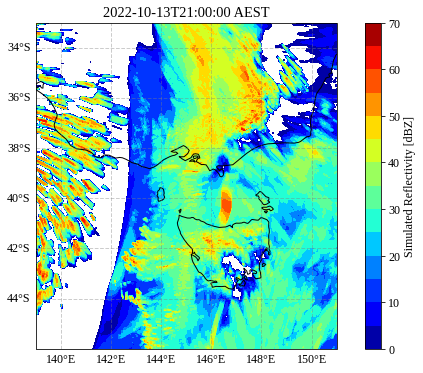

In [43]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

time = np.datetime64('2022-10-13T12:00:00')
time_lab = time + np.timedelta64(9, 'h')

ax.set_title(str(time_lab) + ' AEST')

levels=np.arange(260,302,2)
levels=np.arange(0,75,5)
cmap='jet'

cont = ax.contourf(
    data.lon, data.lat, 
    data.sel(time=time).values,
    levels=levels, cmap=cmap)
grid = ax.gridlines(
    crs=ccrs.PlateCarree(), draw_labels=True,
    linewidth=1, color='gray', alpha=0.4, linestyle='--')
grid.right_labels = False
grid.top_labels = False
ax.coastlines(resolution='50m', zorder=1)
cbar = fig.colorbar(cont)
cbar.set_label('Simulated Reflectivity [dBZ]')

In [71]:
data

<xarray.DataArray 'max_radar_refl_1km' (time: 36, lat: 964, lon: 890)>
[30886560 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2022-08-13T01:00:00 ... 2022-08-14T12:00:00
  * lat      (lat) float64 -33.0 -33.01 -33.03 -33.04 ... -45.97 -45.99 -46.0
  * lon      (lon) float64 139.0 139.0 139.0 139.0 ... 151.0 151.0 151.0 151.0
Attributes:
    grid_type:    spatial
    level_type:   single
    units:        dBZ
    long_name:    maxmium derived radar reflectivity at 1km AGL
    stash_code:   4112
    accum_type:   maximum
    accum_units:  minutes
    accum_value:  60
    _ChunkSizes:  [  1 964 890]

In [ ]:
base_path = 'https://dapds00.nci.org.au/thredds/dodsC/wr45/ops_aps3/access-vt/1/20221012/0000/fc/sfc/'
field = 'max_maxcol_refl'
data = xr.open_dataset(base_path + field + '.nc')[field]